# Melborne Housing Price Linear regression

In [8]:
#importing the generall library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#importing regression libray

from sklearn.linear_model import LinearRegression


#importing evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#import train test split
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("housing.csv") # redaing the data

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<AxesSubplot:>

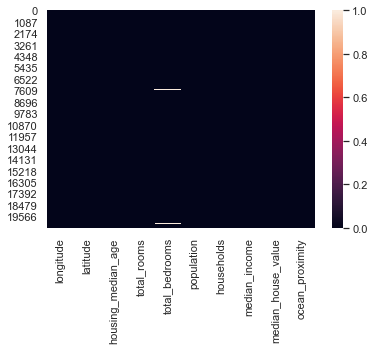

In [5]:
sns.heatmap(df.isnull())

In [6]:
df.isnull().sum() # since we have a large dataset we can afford to directly drop the null values

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
df.shape

(20640, 10)

In [45]:
df.dropna(inplace = True)

In [46]:
df.shape

(20433, 10)

In [47]:
print(df.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


In [48]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<AxesSubplot:>

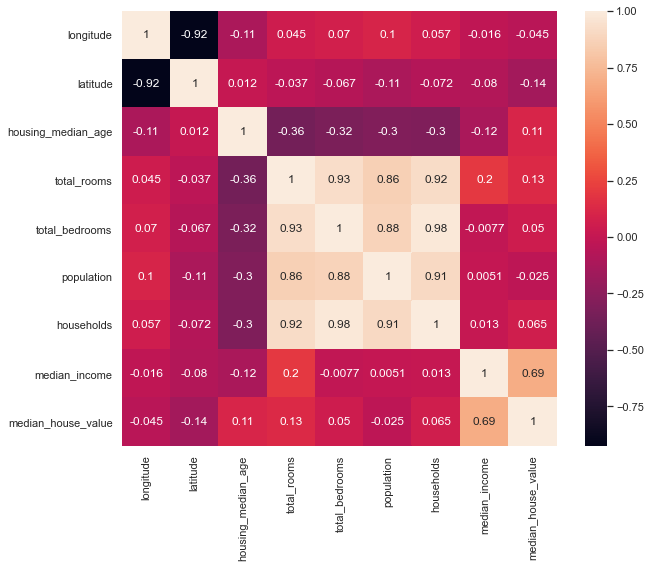

In [49]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), annot = True, square = True)

In [50]:
def correlation(data,thrs):
    col_corr = set()
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > thrs:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [51]:
const_col = correlation(df,0.9)

In [52]:
const_col

{'households', 'latitude', 'total_bedrooms'}

In [53]:
df.drop(const_col, axis = 1, inplace = True) # droping the constant columns

In [54]:
df.head()

,longitude,housing_median_age,total_rooms,population,median_income,median_house_value,ocean_proximity
0,-122.23,41.0,880.0,322.0,8.3252,452600.0,NEAR BAY
1,-122.22,21.0,7099.0,2401.0,8.3014,358500.0,NEAR BAY
2,-122.24,52.0,1467.0,496.0,7.2574,352100.0,NEAR BAY
3,-122.25,52.0,1274.0,558.0,5.6431,341300.0,NEAR BAY
4,-122.25,52.0,1627.0,565.0,3.8462,342200.0,NEAR BAY


In [55]:
df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

<AxesSubplot:xlabel='ocean_proximity', ylabel='median_house_value'>

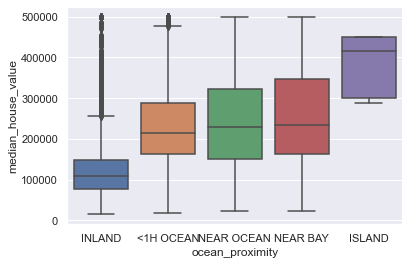

In [56]:
sns.boxplot(x = "ocean_proximity", y = "median_house_value", data = df, 
            order = ['INLAND','<1H OCEAN','NEAR OCEAN','NEAR BAY','ISLAND'])

C:\Users\iftaq\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='median_house_value', ylabel='Density'>

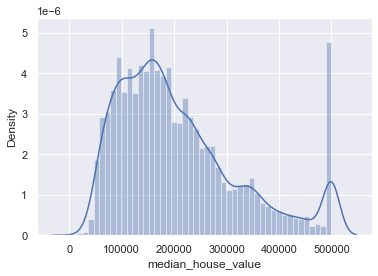

In [57]:
sns.distplot(df["median_house_value"])

C:\Users\iftaq\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='median_income', ylabel='Density'>

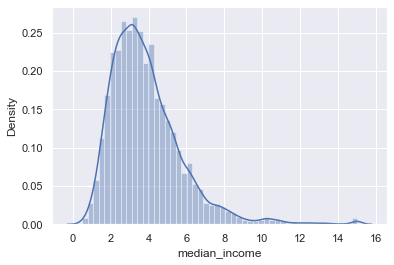

In [58]:
sns.distplot(df["median_income"])

C:\Users\iftaq\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='population', ylabel='Density'>

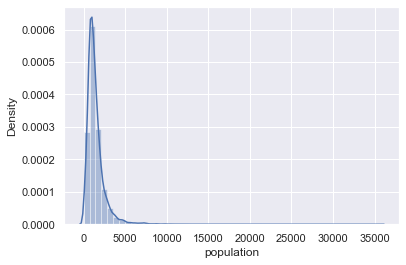

In [59]:
sns.distplot(df["population"])

In [69]:
import scipy.stats as stat
import pylab
import warnings
warnings.filterwarnings("ignore")

In [72]:
def qq_plot(df,feature):
    plt.figure(figsize = (8,8))
    plt.subplot(1,2,1)
    sns.distplot(df[feature], hist_kws = {"color": "g","alpha":.75})
    plt.subplot(1,2,2)
    stat.probplot(df[feature], dist = "norm", plot = pylab)
    plt.show()

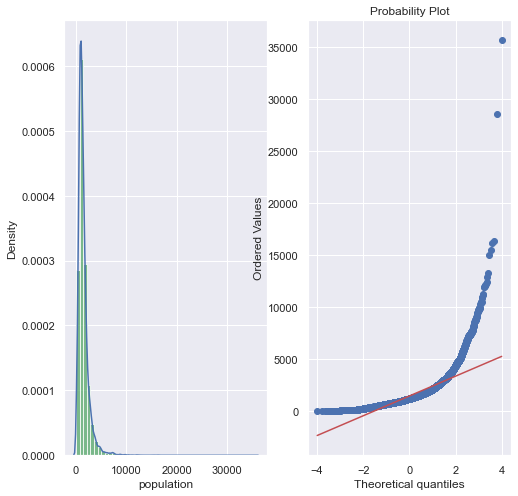

In [73]:
qq_plot(df,"population")

In [74]:
df["pop_log"] = np.log(df.population)

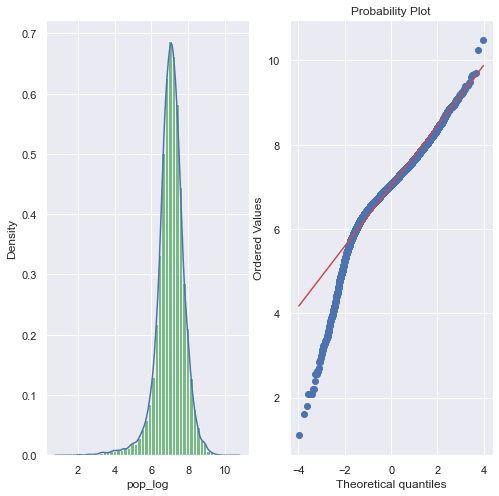

In [76]:
qq_plot(df,'pop_log')

In [80]:
df["exp_pop"] =df["population"] **(1/1.2)

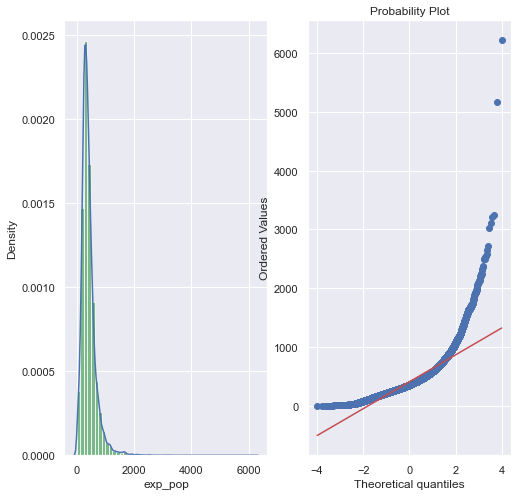

In [81]:
qq_plot(df,"exp_pop")

,longitude,housing_median_age,total_rooms,population,median_income,median_house_value,ocean_proximity,pop_log,exp_pop
0,-122.23,41.0,880.0,322.0,8.3252,452600.0,NEAR BAY,5.774552,122.992858
1,-122.22,21.0,7099.0,2401.0,8.3014,358500.0,NEAR BAY,7.783641,656.135396
2,-122.24,52.0,1467.0,496.0,7.2574,352100.0,NEAR BAY,6.206576,176.292863
3,-122.25,52.0,1274.0,558.0,5.6431,341300.0,NEAR BAY,6.324359,194.474128
4,-122.25,52.0,1627.0,565.0,3.8462,342200.0,NEAR BAY,6.336826,196.505046
...,...,...,...,...,...,...,...,...,...
20635,-121.09,25.0,1665.0,845.0,1.5603,78100.0,INLAND,6.739337,274.819318
20636,-121.21,18.0,697.0,356.0,2.5568,77100.0,INLAND,5.874931,133.723684
20637,-121.22,17.0,2254.0,1007.0,1.7000,92300.0,INLAND,6.914731,318.071355
20638,-121.32,18.0,1860.0,741.0,1.8672,84700.0,INLAND,6.608001,246.328790


In [83]:
df["sqrt_pop"] =df["population"] **(1/2)

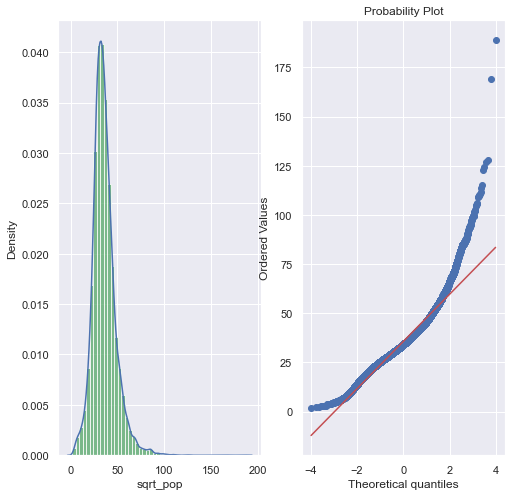

In [84]:
qq_plot(df,"sqrt_pop")

In [85]:
df["bxcx_pop"], parameters = stat.boxcox(df.population)

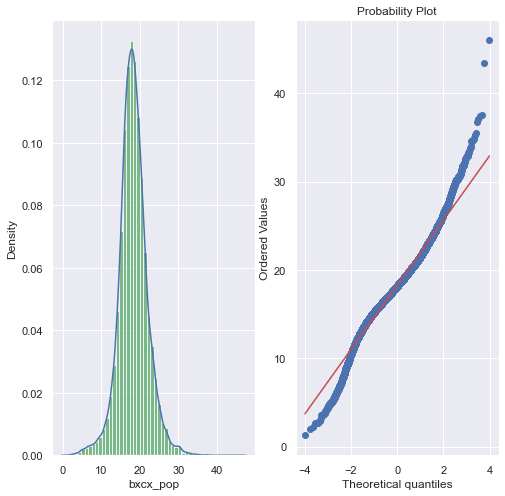

In [87]:
qq_plot(df,"bxcx_pop")

In [88]:
#model building
df.head()

,longitude,housing_median_age,total_rooms,population,median_income,median_house_value,ocean_proximity,pop_log,exp_pop,sqrt_pop,bxcx_pop
0,-122.23,41.0,880.0,322.0,8.3252,452600.0,NEAR BAY,5.774552,122.992858,17.944358,12.313702
1,-122.22,21.0,7099.0,2401.0,8.3014,358500.0,NEAR BAY,7.783641,656.135396,49.000000,22.349787
2,-122.24,52.0,1467.0,496.0,7.2574,352100.0,NEAR BAY,6.206576,176.292863,22.271057,14.089610
3,-122.25,52.0,1274.0,558.0,5.6431,341300.0,NEAR BAY,6.324359,194.474128,23.622024,14.606008
4,-122.25,52.0,1627.0,565.0,3.8462,342200.0,NEAR BAY,6.336826,196.505046,23.769729,14.661511


In [89]:
df.drop(["pop_log","exp_pop","sqrt_pop","bxcx_pop"], axis = 1, inplace = True)

In [90]:
df.head()

,longitude,housing_median_age,total_rooms,population,median_income,median_house_value,ocean_proximity
0,-122.23,41.0,880.0,322.0,8.3252,452600.0,NEAR BAY
1,-122.22,21.0,7099.0,2401.0,8.3014,358500.0,NEAR BAY
2,-122.24,52.0,1467.0,496.0,7.2574,352100.0,NEAR BAY
3,-122.25,52.0,1274.0,558.0,5.6431,341300.0,NEAR BAY
4,-122.25,52.0,1627.0,565.0,3.8462,342200.0,NEAR BAY


In [91]:
df = pd.get_dummies(df,drop_first = True)

In [93]:
df.head()

,longitude,housing_median_age,total_rooms,population,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,41.0,880.0,322.0,8.3252,452600.0,0,0,1,0
1,-122.22,21.0,7099.0,2401.0,8.3014,358500.0,0,0,1,0
2,-122.24,52.0,1467.0,496.0,7.2574,352100.0,0,0,1,0
3,-122.25,52.0,1274.0,558.0,5.6431,341300.0,0,0,1,0
4,-122.25,52.0,1627.0,565.0,3.8462,342200.0,0,0,1,0


In [94]:
X = df.drop("median_house_value", axis = 1)
y = df.median_house_value

In [95]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0, test_size = .25)

In [96]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [97]:
#train score
lr_model.score(X_train,y_train)

0.6124221444758358

In [98]:
#test_score
lr_model.score(X_test,y_test)

0.6112695328317379

In [112]:
mean_squared_error(y_train,lr_model.predict(X_train))

5159041837.904699

In [116]:
r2_score(y_train,lr_model.predict(X_train))

0.6124221444758358

In [99]:
from sklearn.linear_model import Lasso

In [110]:
ls_model = Lasso()
ls_model.fit(X_train,y_train)

Lasso(alpha=10500)

In [111]:
#test score
ls_model.score(X_train,y_train)

0.5691386970369665